In [13]:
from lyricsgenius import Genius
import pandas as pd


In [14]:
token = "vq-3P0pd8mdh_iTuSXqtnIv-uIxWYtjAhxm6ACPDP3z6-AVI_8JPWy_YhZGyRe0j"
genius = Genius(token)
url = "https://github.com/CultureAsData-UIUC/is310-fall-2024-group-3/raw/refs/heads/main/data%20sets/Billboard_Hot100_Songs_Spotify_1946-2022.csv"
df = pd.read_csv(url)
df['Lyrics'] = ''


In [15]:
for index, row in df.head(3).iterrows():
    title = row["Song"]
    song = genius.search_song(title)
    df.at[index, "Lyrics"] = song.lyrics


Searching for "Prisoner of Love - Remastered - 1992"...
Done.
Searching for "To Each His Own"...
Done.
Searching for "The Gypsy"...
Done.


In [16]:
print(df.head(3)['Lyrics'])
new_df = df.head(3)

0    1 ContributorPrisoner of love - 1999 remastere...
1    11 ContributorsTo Each His Own Lyrics[Intro]\n...
2    5 ContributorsThe Gypsy LyricsIn a quaint cara...
Name: Lyrics, dtype: object


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6879 entries, 0 to 6878
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Song                 6879 non-null   object 
 1   Album                6879 non-null   object 
 2   Album Release Date   6879 non-null   object 
 3   Artist Names         6879 non-null   object 
 4   Artist(s) Genres     6879 non-null   object 
 5   Hot100 Ranking Year  6879 non-null   int64  
 6   Hot100 Rank          6879 non-null   int64  
 7   Song Length(ms)      6879 non-null   int64  
 8   Spotify Link         6879 non-null   object 
 9   Song Image           6879 non-null   object 
 10  Spotify URI          6879 non-null   object 
 11  Popularity           6879 non-null   int64  
 12  Acousticness         6879 non-null   float64
 13  Danceability         6879 non-null   float64
 14  Energy               6879 non-null   float64
 15  Instrumentalness     6879 non-null   f

In [18]:
new_df

Song                          Album  \
0  Prisoner of Love - Remastered - 1992              Today & Yesterday   
1                       To Each His Own  The Best Of The Mercury Years   
2                             The Gypsy                  The Anthology   

  Album Release Date       Artist Names  \
0         1993-10-25     ['Perry Como']   
1         1996-01-01    ['Eddy Howard']   
2         1998-06-16  ['The Ink Spots']   

                        Artist(s) Genres  Hot100 Ranking Year  Hot100 Rank  \
0  ['adult standards', 'easy listening']                 1946            1   
1                 ['british dance band']                 1946            2   
2      ['vocal harmony group', 'lounge']                 1946            3   

   Song Length(ms)                                       Spotify Link  \
0           211866  https://open.spotify.com/track/6doXi6MzsJzr7t9...   
1           184293  https://open.spotify.com/track/4xRdYnoXKNDPPrE...   
2           164533  https://open.spotify.com/track/4kuoSXnEyTKWypY...   

                                          Song Image  ... Instrumentalness  \
0  https://i.scdn.co/image/ab67616d00001e02202774...  ...          0.00209   
1  https://i.scdn.co/image/ab67616d00001e02fd29e5...  ...          0.00006   
2  https://i.scdn.co/image/ab67616d00001e02383811...  ...          0.00000   

   Liveness  Loudness  Speechiness   Tempo  Valence  Key  Mode  \
0     0.167   -11.121       0.0328  80.064    0.185    2     1   
1     0.181   -16.766       0.0394  81.037    0.150    3     1   
2     0.103   -15.463       0.0552  76.056    0.222    7     1   

   Time Signature                                             Lyrics  
0               4  1 ContributorPrisoner of love - 1999 remastere...  
1               4  11 ContributorsTo Each His Own Lyrics[Intro]\n...  
2               4  5 ContributorsThe Gypsy LyricsIn a quaint cara...  

[3 rows x 25 columns]

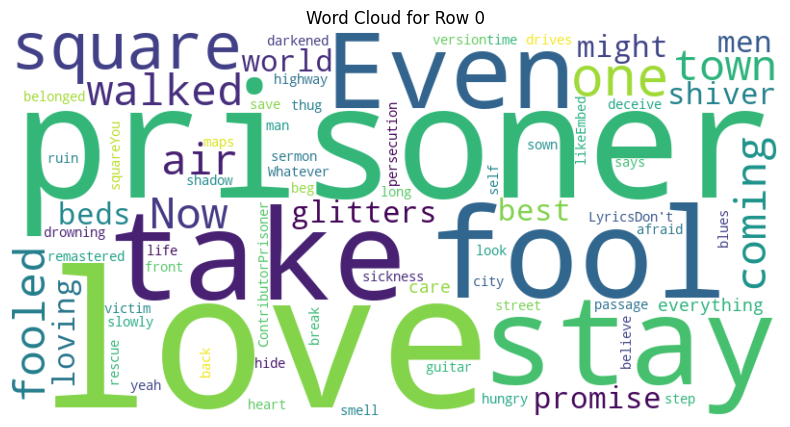

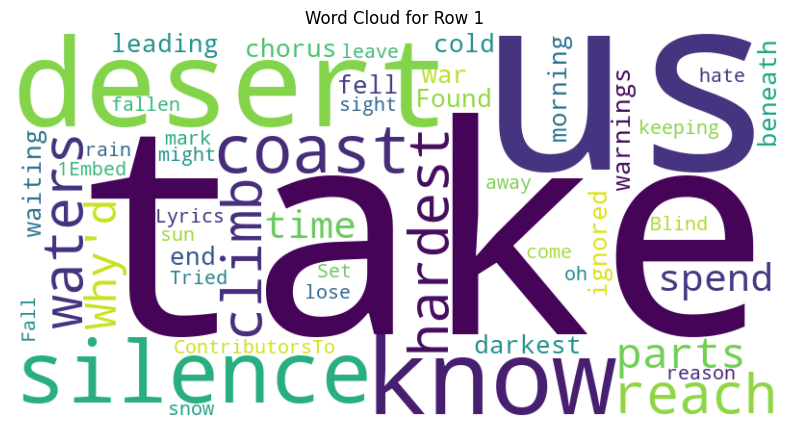

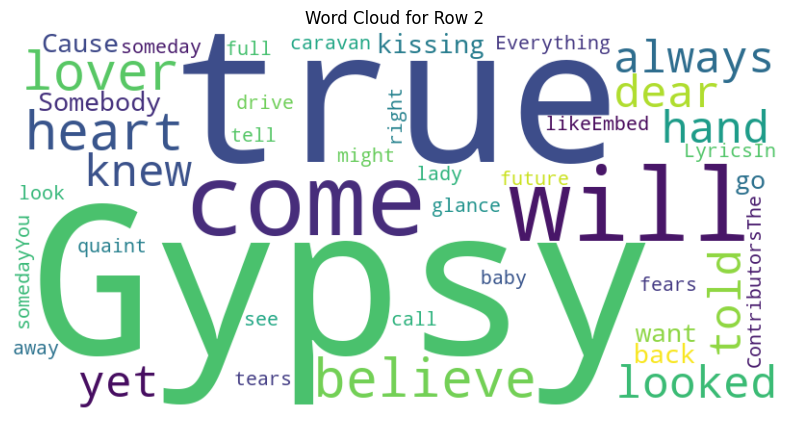

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re


lyrics_text = ' '.join(new_df['Lyrics'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lyrics_text)

def clean_lyrics(text):
    return re.sub(r'\[.*?\]', '', text)

for index, row in new_df.iterrows():
    lyrics_text = clean_lyrics(row['Lyrics'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lyrics_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Row {index}")
    plt.axis('off')
    plt.show()


In [20]:
print(df.loc[1, "Lyrics"])

11 ContributorsTo Each His Own Lyrics[Intro]
Is that where we're at?

[Verse 1]
If we reach up as the waters climb in us
The hardest parts
Blind to reason, lose the sight of what's to come
Below or what's above
Fall in the rain, keeping the sun below us
Set away your hate

[Chorus]
And oh
Why'd you spend your time leading the chorus
When the war was just waiting before us?
As if you didn't know
You ignored all the darkest of warnings
Found our end in the silence of morning
It fell beneath the cold

[Post-Chorus]
I'll take the desert, you take the coast
But to each his own
I'll take the desert

[Verse 2]
If we reach up as the waters climb in us
The hardest parts of your silence
Tried to mark the fallen snow
We'll leave you here, you know?
You might also like[Chorus]
Why'd you spend your time leading the chorus
When the war was just waiting before us?
As if you didn't know
You ignored all the darkest of warnings
Found our end in the silence of morning
It fell beneath the cold

[Post-Chor

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6879 entries, 0 to 6878
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Song                 6879 non-null   object 
 1   Album                6879 non-null   object 
 2   Album Release Date   6879 non-null   object 
 3   Artist Names         6879 non-null   object 
 4   Artist(s) Genres     6879 non-null   object 
 5   Hot100 Ranking Year  6879 non-null   int64  
 6   Hot100 Rank          6879 non-null   int64  
 7   Song Length(ms)      6879 non-null   int64  
 8   Spotify Link         6879 non-null   object 
 9   Song Image           6879 non-null   object 
 10  Spotify URI          6879 non-null   object 
 11  Popularity           6879 non-null   int64  
 12  Acousticness         6879 non-null   float64
 13  Danceability         6879 non-null   float64
 14  Energy               6879 non-null   float64
 15  Instrumentalness     6879 non-null   f

In [22]:
df['Album Release Date'] = pd.to_datetime(df['Album Release Date'], errors='coerce')

# Extract the year and create a new column 'Release Year'
df['Release Year'] = df['Album Release Date'].dt.year

# Display the DataFrame to verify the new column
print(df.head())

                                   Song  \
0  Prisoner of Love - Remastered - 1992   
1                       To Each His Own   
2                             The Gypsy   
3                     Five Minutes More   
4                     Rumors Are Flying   

                                               Album Album Release Date  \
0                                  Today & Yesterday         1993-10-25   
1                      The Best Of The Mercury Years         1996-01-01   
2                                      The Anthology         1998-06-16   
3  The Columbia Years (1943-1952): The Complete R...         1993-10-08   
4                                    1946 Broadcasts         2006-11-30   

        Artist Names                                 Artist(s) Genres  \
0     ['Perry Como']            ['adult standards', 'easy listening']   
1    ['Eddy Howard']                           ['british dance band']   
2  ['The Ink Spots']                ['vocal harmony group', 'lounge']  

In [23]:
# Filter the DataFrame to include only rows with 'Release Year' between 2007 and 2009
df['Album Release Date'] = pd.to_datetime(df['Album Release Date'], errors='coerce')
df['Release Year'] = df['Album Release Date'].dt.year

filtered_df = df[(df['Hot100 Ranking Year'] >= 2007) & (df['Hot100 Ranking Year'] <= 2009)]

sample_df = filtered_df.sample(n=10, random_state=1)



In [24]:
import time


Searching for "Flashing Lights"...
Done.


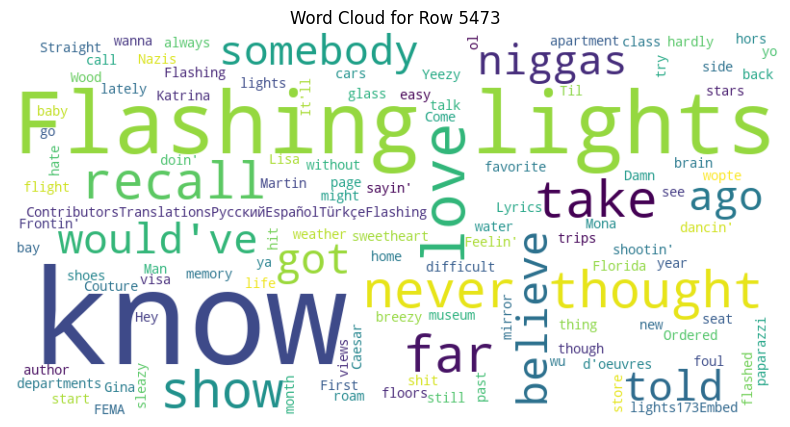

Searching for "So What"...
Done.


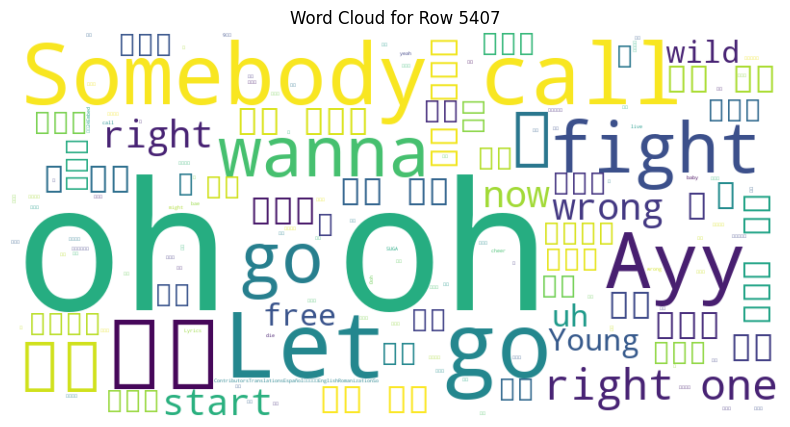

Searching for "Can’t Help but Wait"...
Done.


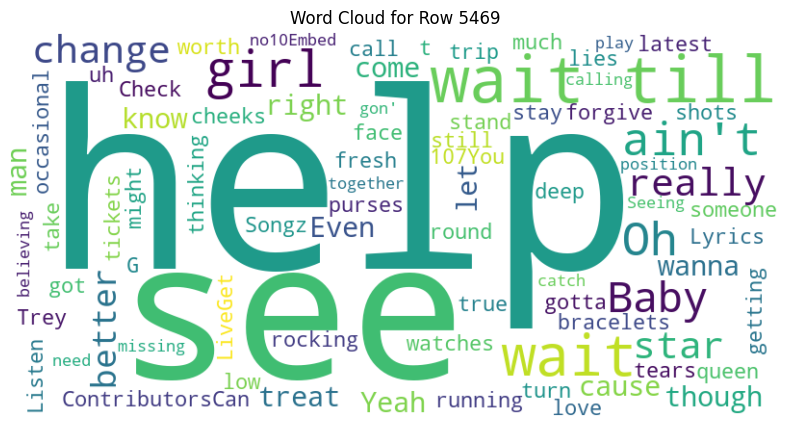

Searching for "Use Somebody"...
Done.


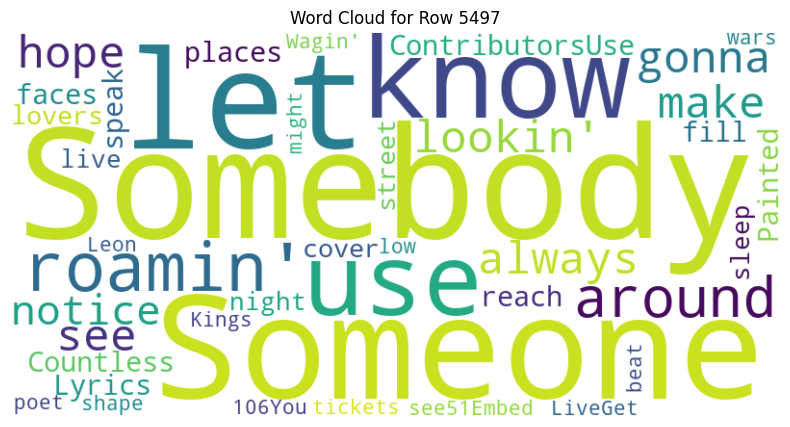

Searching for "Love Song"...
Done.


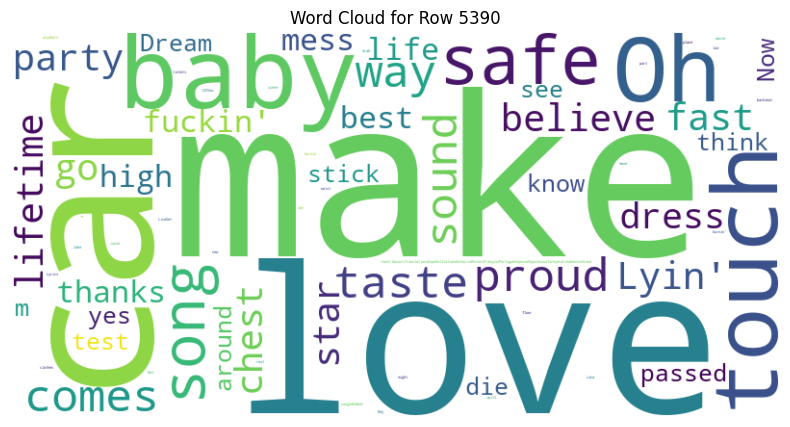

Searching for "Leavin'"...
Done.


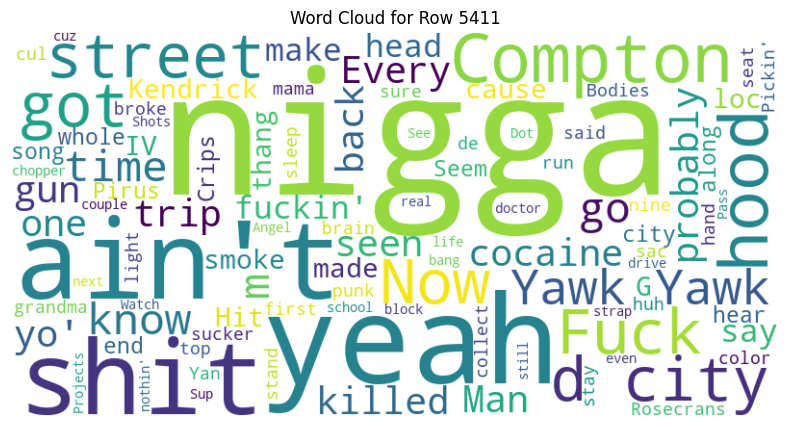

Searching for "Hypnotized (feat. Akon)"...
Done.


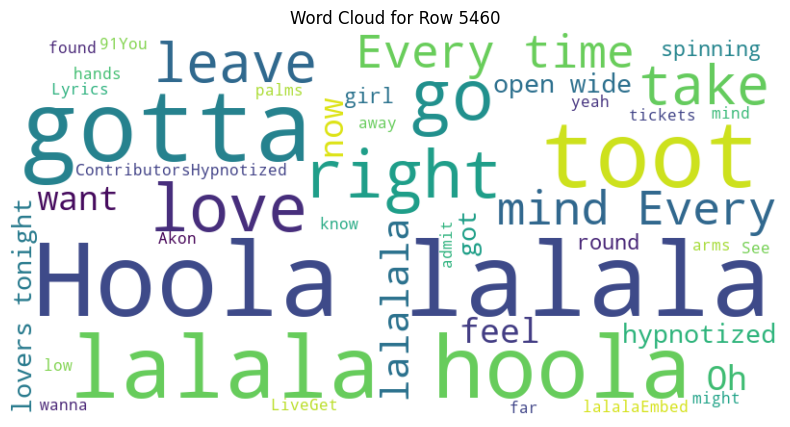

Searching for "Rehab"...
Done.


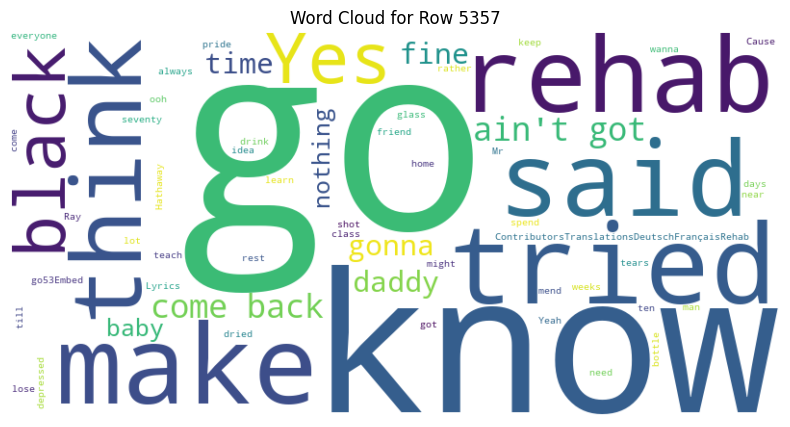

Searching for "White Horse (Taylor’s Version)"...
Done.


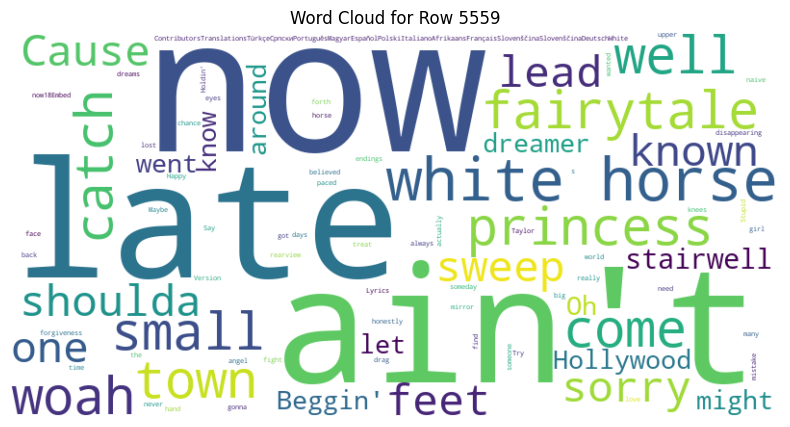

Searching for "Good Girls Go Bad (feat. Leighton Meester)"...
Done.


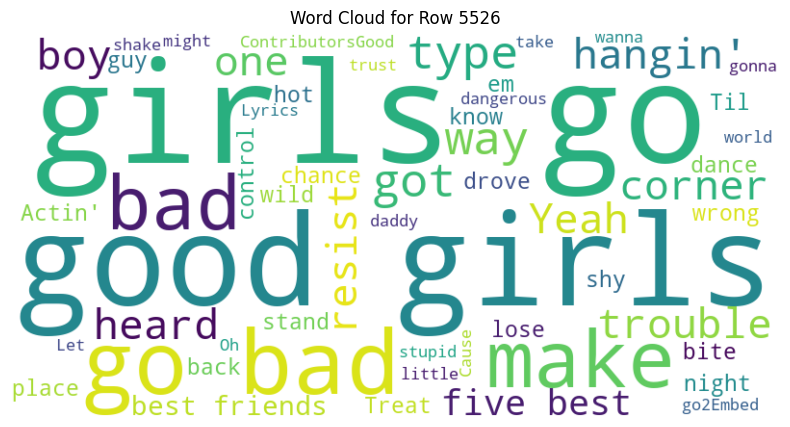

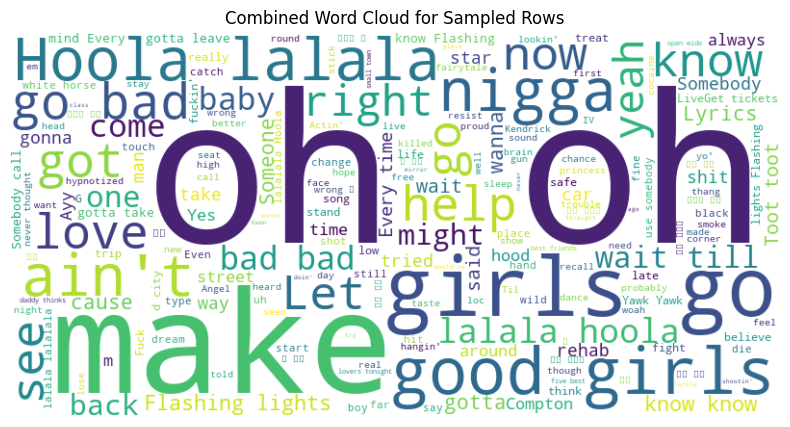

In [25]:

def clean_lyrics(text):
    return re.sub(r'\[.*?\]', '', text)

# Retrieve lyrics and generate word clouds
all_lyrics = ""
for index, row in sample_df.iterrows():
    title = row["Song"]
    song = genius.search_song(title)

    if song is None:
            print(f"Lyrics not found for song: {title}, skipping...")
            continue

    lyrics_text = clean_lyrics(song.lyrics)
    sample_df.at[index, "Lyrics"] = lyrics_text
    all_lyrics += " " + lyrics_text
    
    # Generate individual word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lyrics_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Row {index}")
    plt.axis('off')
    plt.show()
    time.sleep(10)
# Generate combined word cloud
combined_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)
plt.figure(figsize=(10, 5))
plt.imshow(combined_wordcloud, interpolation='bilinear')
plt.title("Combined Word Cloud for Sampled Rows")
plt.axis('off')
plt.show()

In [26]:
sample_df

Song  \
5473                             Flashing Lights   
5407                                     So What   
5469                         Can’t Help but Wait   
5497                                Use Somebody   
5390                                   Love Song   
5411                                     Leavin'   
5460                     Hypnotized (feat. Akon)   
5357                                       Rehab   
5559              White Horse (Taylor’s Version)   
5526  Good Girls Go Bad (feat. Leighton Meester)   

                               Album Album Release Date  \
5473                      Graduation         2007-09-11   
5407                   Giraffe Track         2020-09-25   
5469                THIS is the 00's         2023-05-17   
5497               Only By The Night         2008-09-23   
5390                    Little Voice         2007-07-03   
5411           Departure - Recharged                NaT   
5460              The Real Testament         2007-08-06   
5357  Back To Black (Deluxe Edition)                NaT   
5559     Fearless (Taylor's Version)         2021-04-09   
5526                        Hot Mess         2009-07-07   

                                Artist Names  \
5473                 ['Kanye West', 'Dwele']   
5407                          ['Pink Navel']   
5469                          ['Trey Songz']   
5497                       ['Kings of Leon']   
5390                      ['Sara Bareilles']   
5411                     ['Jesse McCartney']   
5460                       ['Plies', 'Akon']   
5357                       ['Amy Winehouse']   
5559                        ['Taylor Swift']   
5526  ['Cobra Starship', 'Leighton Meester']   

                                       Artist(s) Genres  Hot100 Ranking Year  \
5473      ['chicago rap', 'hip hop', 'rap', 'neo soul']                 2008   
5407                                 ['boston hip hop']                 2008   
5469  ['southern hip hop', 'dance pop', 'urban conte...                 2008   
5497                            ['rock', 'modern rock']                 2009   
5390  ['neo mellow', 'post-teen pop', 'lilith', 'pop...                 2008   
5411              ['post-teen pop', 'dance pop', 'pop']                 2008   
5460  ['southern hip hop', 'dance pop', 'miami hip h...                 2008   
5357                       ['british soul', 'neo soul']                 2007   
5559                                            ['pop']                 2009   
5526     ['neon pop punk', 'post-teen pop', 'pop punk']                 2009   

      Hot100 Rank  Song Length(ms)  \
5473           90           237506   
5407           24           192000   
5469           86           206413   
5497           14           230760   
5390            7           258826   
5411           28           216880   
5460           77           188493   
5357           74           214946   
5559           76           234515   
5526           43           196413   

                                           Spotify Link  \
5473  https://open.spotify.com/track/5TRPicyLGbAF2LG...   
5407  https://open.spotify.com/track/7BpAEEZkSvvTjkF...   
5469  https://open.spotify.com/track/4808yRJ7NVQ37cW...   
5497  https://open.spotify.com/track/5VGlqQANWDKJFl0...   
5390  https://open.spotify.com/track/4E6cwWJWZw2zWf7...   
5411  https://open.spotify.com/track/20ORwCJusz4KS2P...   
5460  https://open.spotify.com/track/3LN41NUdHkyNqQh...   
5357  https://open.spotify.com/track/3N4DI1vuTSX1tz7...   
5559  https://open.spotify.com/track/5YL553x8sHderRB...   
5526  https://open.spotify.com/track/7kMfu3KUydmrFVG...   

                                             Song Image  ... Liveness  \
5473  https://i.scdn.co/image/ab67616d00001e0226f7f1...  ...   0.3860   
5407  https://i.scdn.co/image/ab67616d00001e02d8599c...  ...   0.3490   
5469  https://i.scdn.co/image/ab67616d00001e0200f538...  ...   0.0912   
5497  https://i.scdn.co/image/ab67616d00001e022519

In [27]:

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# Assuming sample_df is your DataFrame with the 'Lyrics' column
# Clean the lyrics text by removing NaN values
lyrics = sample_df['Lyrics'].dropna().tolist()

# Initialize BERTopic
topic_model = BERTopic()

# Fit the model on the lyrics data
topics, probabilities = topic_model.fit_transform(lyrics)
vectorizer_model = CountVectorizer(stop_words="english")
topic_model.update_topics(lyrics, vectorizer_model=vectorizer_model)
# Get the topic information
topic_info = topic_model.get_topic_info()

# Display the topic information
print(topic_info)

# Visualize the topics

/Users/jeffreyfang/is310-fall-2024-group-3/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


   Topic  Count                 Name  \
0     -1     10  -1_know_im_bad_make   

                                      Representation  \
0  [know, im, bad, make, like, girls, ohoh, good,...   

                                 Representative_Docs  
0  [243 ContributorsTranslationsРусскийEspañolTür...  


In [28]:
topic_model.get_topic_info()


Topic  Count                 Name  \
0     -1     10  -1_know_im_bad_make   

                                      Representation  \
0  [know, im, bad, make, like, girls, ohoh, good,...   

                                 Representative_Docs  
0  [243 ContributorsTranslationsРусскийEspañolTür...

In [30]:
"""def clean_lyrics(text):
    return re.sub(r'\[.*?\]', '', text)


all_lyrics = ""
while True:
    try:
    
        for index, row in reccesion_songs.iterrows():
            title = row["Song"]
            song = genius.search_song(title)

            if song is None:
                    print(f"Lyrics not found for song: {title}, skipping...")
                    continue
            

            lyrics_text = clean_lyrics(song.lyrics)
            reccesion_songs.at[index, "Lyrics"] = lyrics_text
            all_lyrics += " " + lyrics_text
        break
    except:
        pass"""

<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
/var/folders/v4/1my8tqmj4js1tytp6lnfnrm40000gn/T/ipykernel_35893/1355098497.py:1: SyntaxWarning: invalid escape sequence '\['
  """def clean_lyrics(text):


'def clean_lyrics(text):\n    return re.sub(r\'\\[.*?\\]\', \'\', text)\n\n\nall_lyrics = ""\nwhile True:\n    try:\n    \n        for index, row in reccesion_songs.iterrows():\n            title = row["Song"]\n            song = genius.search_song(title)\n\n            if song is None:\n                    print(f"Lyrics not found for song: {title}, skipping...")\n                    continue\n            \n\n            lyrics_text = clean_lyrics(song.lyrics)\n            reccesion_songs.at[index, "Lyrics"] = lyrics_text\n            all_lyrics += " " + lyrics_text\n        break\n    except:\n        pass'

In [31]:

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
dff = pd.read_csv("filtered_songs.csv")

def remove_short_words(text):
    return re.sub(r'\b\w{1,3}\b', '', text)

# Apply the function to the 'Lyrics' column
dff['Lyrics'] = dff['Lyrics'].apply(lambda x: remove_short_words(x) if isinstance(x, str) else x)
lyrics = dff['Lyrics'].dropna().tolist()
print(len(lyrics))
topic_model = BERTopic()

topics, probabilities = topic_model.fit_transform(lyrics)
vectorizer_model = CountVectorizer(stop_words="english")
topic_model.update_topics(lyrics, vectorizer_model=vectorizer_model)

topic_info = topic_model.get_topic_info()

print(topic_info)



FileNotFoundError: [Errno 2] No such file or directory: 'filtered_songs.csv'

In [ ]:
topic_model.get_topic_info()


Topic  Count              Name  \
0      0    278             0____   
1      1     22  1_im_hey_like_oh   

                                      Representation  \
0                               [, , , , , , , , , ]   
1  [im, hey, like, oh, dont, know, watch, way, ho...   

                                 Representative_Docs  
0                                             [, , ]  
1  [3 ContributorsThe Way I Are (Vs Nephew) Lyric...

In [ ]:
len(filtered_df)

300

In [ ]:
filtered_df.to_csv('lyrics_songs.csv', index=False)

In [ ]:
import requests
url= 'https://api.lyrics.ovh/v1/'




In [ ]:
filtered_df['Lyrics'] = ''
print(filtered_df.head())
filtered_df.to_csv("reccesion_songs.csv", index=False)

                                                  Song  \
5284                                     Irreplaceable   
5285                                Umbrella (Sped Up)   
5286                                  The Sweet Escape   
5287                    Big Girls Don't Cry (Personal)   
5288  Buy U a Drank (Shawty Snappin') (feat. Yung Joc)   

                            Album Album Release Date  \
5284         B'Day Deluxe Edition         2007-05-29   
5285                  Speedy Kiwi         2022-08-03   
5286             The Sweet Escape         2006-01-01   
5287                 The Dutchess         2006-09-13   
5288  Epiphany (Expanded Edition)         2007-06-05   

                  Artist Names  \
5284               ['Beyoncé']   
5285                  ['kiwi']   
5286  ['Gwen Stefani', 'Akon']   
5287                ['Fergie']   
5288    ['T-Pain', 'Yung Joc']   

                                       Artist(s) Genres  Hot100 Ranking Year  \
5284                         

In [ ]:
print(reccesion_songs)

NameError: name 'reccesion_songs' is not defined

In [61]:
reccesion_songs = pd.read_csv("reccesion_songs.csv")
# Retrieve lyrics and generate word clouds

In [69]:
import re
import requests
# Function to get lyrics using the lyrics.ovh API
def get_lyrics(song_title, artist_name):
    url = f"https://api.lyrics.ovh/v1/{artist_name}/{song_title}"
    response = requests.get(url)
    if response.status_code == 200:
        try:
            data = response.json()
            return data.get('lyrics', 'Lyrics not found')
        except ValueError:
            return 'Lyrics not found'
    else:
        return 'Lyrics not found'

# Assuming dff is your DataFrame with 'Song' and 'Artists' columns
# Initialize the 'Lyrics' column
def extract_artist_name(artist_string):
        artist_string = artist_string.replace("[", "").replace("]", "").replace("'", "").replace('"', "").strip()
        return artist_string.split(",")[0].strip()


reccesion_songs['Lyrics'] = ''
# Loop through the DataFrame and retrieve lyrics
for index, row in reccesion_songs.iterrows():
    song_title = row['Song']
    row["Artist Names"] = extract_artist_name(row["Artist Names"])

    artist_name = row['Artist Names']
    print(artist_name)
    print(artist_name)
    if artist_name:
        lyrics = get_lyrics(song_title, artist_name)
        reccesion_songs.at[index, 'Lyrics'] = lyrics
    else:
        reccesion_songs.at[index, 'Lyrics'] = 'Artist not found'

reccesion_songs

Beyoncé
Beyoncé
Rihanna
Rihanna
Gwen Stefani
Gwen Stefani
Fergie
Fergie
T-Pain
T-Pain
Carrie Underwood
Carrie Underwood
Plain White Ts
Plain White Ts
Akon
Akon
Nelly Furtado
Nelly Furtado
Fergie
Fergie
Akon
Akon
Avril Lavigne
Avril Lavigne
Maroon 5
Maroon 5
Shop Boyz
Shop Boyz
Akon
Akon
MiMS
MiMS
Daughtry
Daughtry
Timbaland
Timbaland
Fergie
Fergie
Soulja Boy
Soulja Boy
Timbaland
Timbaland
Justin Timberlake
Justin Timberlake
Gym Class Heroes
Gym Class Heroes
The Fray
The Fray
Daughtry
Daughtry
Justin Timberlake
Justin Timberlake
Kanye West
Kanye West
Jim Jones
Jim Jones
Pink
Pink
Unk
Unk
Sean Kingston
Sean Kingston
Fall Out Boy
Fall Out Boy
T-Pain
T-Pain
Huey
Huey
Lil Peep
Lil Peep
Nickelback
Nickelback
Fall Out Boy
Fall Out Boy
Linkin Park
Linkin Park
Justin Timberlake
Justin Timberlake
Lloyd
Lloyd
Elliott Yamin
Elliott Yamin
Diddy Featuring Keyshia Cole
Diddy Featuring Keyshia Cole
Fat Joe
Fat Joe
Fabolous
Fabolous
Omarion
Omarion
Hinder
Hinder
John Mayer
John Mayer
Robin Thicke
Robin

Song  \
0                                        Irreplaceable   
1                                             Umbrella   
2                                     The Sweet Escape   
3                       Big Girls Don't Cry (Personal)   
4     Buy U a Drank (Shawty Snappin') (feat. Yung Joc)   
..                                                 ...   
295                                            Goodbye   
296  Say Hey (I Love You) (feat. Cherine Tanya Ande...   
297  Pop Champagne (feat. Juelz Santana) - Explicit...   
298                               Pretty Wings - uncut   
299                                    Never Say Never   

                           Album Album Release Date  \
0           B'Day Deluxe Edition         2007-05-29   
1                    Speedy Kiwi         2022-08-03   
2               The Sweet Escape         2006-01-01   
3                   The Dutchess         2006-09-13   
4    Epiphany (Expanded Edition)         2007-06-05   
..                           ...                ...   
295     Exposed (Deluxe Edition)         2009-01-01   
296            All Rebel Rockers         2008-09-09   
297                Pray IV Reign         2009-03-19   
298    BLACKsummers'night (2009)         2009-07-07   
299                     The Fray         2009-02-02   

                                          Artist Names  \
0                                          ['Beyoncé']   
1                                          ['Rihanna']   
2                             ['Gwen Stefani', 'Akon']   
3                                           ['Fergie']   
4                               ['T-Pain', 'Yung Joc']   
..                                                 ...   
295                              ['Kristinia DeBarge']   
296  ['Michael Franti & Spearhead', 'Cherine Tanya ...   
297        ['Jim Jones', 'Ron Browz', 'Juelz Santana']   
298                                        ['Maxwell']   
299                                       ['The Fray']   

                                      Artist(s) Genres  Hot100 Ranking Year  \
0                                       ['pop', 'r&b']                 2007   
1                                          ['sped up']                 2007   
2                                 ['dance pop', 'pop']                 2007   
3                                 ['dance pop', 'pop']                 2007   
4    ['gangster rap', 'southern hip hop', 'dance po...                 2007   
..                                                 ...                  ...   
295                                 ['deep dance pop']                 2009   
296                                  ['reggae fusion']                 2009   
297  ['nyc rap', 'harlem hip hop', 'trap', 'gangste...                 2009   
298  ['urban contemporary', 'neo soul', 'r&b', 'qui...                 2009   
299    ['pop', 'piano rock', 'neo mellow', 'pop rock']                 2009   

     Hot100 Rank  Song Length(ms)  \
0              1           227853   
1              2            82128   
2              3           246466   
3              4           268120   
4              5           227960   
..           ...              ...   
295           96           208133   
296           97           235760   
297           98           215973   
298           99           310520   
299          100           256613   

                                          Spotify Link  \
0    https://open.spotify.com/track/6RX5iL93VZ5fKmy...   
1    https://open.spotify.com/track/1nDB6w3ZdYEzzIi...   
2    https://open.spotify.com/track/66ZcOcouenzZEnz...   
3    https://open.spotify.com/track/4AniPkv5vgdE1n6...   
4    https://open.spotify.com/track/1tkMs9wDPknQ3ZH...   
..                                                 ...   
295  https://open.spotify.com/track/5myYDbAurm1CW03...   
296  https://open.spotify.com/track/383B8ksM58jbV3H...   
297  https://open.spotify.com/track/5lrOsw7J8R7shum...   
298  https://open.spo

In [71]:
reccesion_songs1 = reccesion_songs[reccesion_songs['Lyrics'] != 'Lyrics not found']

reccesion_songs1.to_csv("songslyrics.csv", index=False)

In [80]:

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
dff = pd.read_csv("songslyrics.csv")

def remove_short_words(text):
    return re.sub(r'\b\w{1,3}\b', '', text)

# Apply the function to the 'Lyrics' column
dff['Lyrics'] = dff['Lyrics'].apply(lambda x: remove_short_words(x) if isinstance(x, str) else x)
lyrics = dff['Lyrics'].dropna().tolist()
print(len(lyrics))
topic_model = BERTopic(min_topic_size=5, nr_topics=30)

topics, probabilities = topic_model.fit_transform(lyrics)
vectorizer_model = CountVectorizer(stop_words="english")
topic_model.update_topics(lyrics, vectorizer_model=vectorizer_model)

topic_info = topic_model.get_topic_info()

print(topic_info)

241
    Topic  Count                            Name  \
0      -1     70         -1_yeah_like_know_wanna   
1       0      7  0_away_forever_sweet_heartless   
2       1      7   1_womanizer_stuntin_diva_just   
3       2      8    2_poker_read_face_girlfriend   
4       3     29          3_walk_want_kiss_dance   
5       4     46         4_like_girl_chorus_know   
6       5      5        5_cold_whatcha_mmmm_hard   
7       6      8       6_locked_love_lose_wanted   
8       7      6           7_halo_bout_left_know   
9       8     47          8_love_time_cause_fine   
10      9      8    9_shake_disturbia_night_mind   

                                       Representation  \
0   [yeah, like, know, wanna, double, make, just, ...   
1   [away, forever, sweet, heartless, place, night...   
2   [womanizer, stuntin, diva, just, piece, habit,...   
3   [poker, read, face, girlfriend, realized, make...   
4   [walk, want, kiss, dance, just, club, know, ah...   
5   [like, girl, chorus, know

In [77]:
topic_info

Topic  Count                            Name  \
0      -1     40   -1_yeah_double_like_glamorous   
1       0      9   0_poker_read_battlefield_face   
2       1      8  1_forever_away_heartless_night   
3       2      7     2_cold_loving_whatcha_break   
4       3      4      3_word_says_hear_jerusalem   
5       4      7   4_womanizer_stuntin_diva_just   
6       5     10       5_locked_love_lose_wanted   
7       6     48         6_like_girl_chorus_know   
8       7     75          7_love_time_know_cause   
9       8      8        8_knocks_comes_just_know   
10      9     25          9_walk_want_kiss_dance   

                                       Representation  \
0   [yeah, double, like, glamorous, wanna, drive, ...   
1   [poker, read, battlefield, face, armor, realiz...   
2   [forever, away, heartless, night, singing, ala...   
3   [cold, loving, whatcha, break, stop, just, wan...   
4   [word, says, hear, jerusalem, bells, stoned, s...   
5   [womanizer, stuntin, diva, just, piece, habit,...   
6   [locked, love, lose, wanted, life, lovin, chor...   
7   [like, girl, chorus, know, make, just, money, ...   
8   [love, time, know, cause, shake, gonna, like, ...   
9   [knocks, comes, just, know, gonna, yeah, rehab...   
10  [walk, want, kiss, dance, ahead, club, baby, g...   

                                  Representative_Docs  
0   [Just another  champion sound\r\n  Estelle abo...  
1   [Will  count  ?\r\n: ' been awake   while \r\n...  
2   [  1989,  thoughts were short  hair  long\r\nC...  
3   [[-Pain] \n() \n[ ][Speaking] \nDamn \n\n\n Ju...  
4   [Paper bags  plastic hearts\r\n  belongings  s...  
5   [(feat. Chris Brown, Yung  &  Jones)\r\n[Young...  
6   [(feat. Sean Kingston)\r\n[Natasha:]\r\n...\r\...  
7   [(feat. -Pain)\r\n[Intro:]\r\nBolo!\r\nYeaahh....  
8   [ many people gonna  that they want ,\r\n     ...  
9   [, yeah\r\n ' keep lettin' shit slide\r\nThoug...  
10  [Gotta     ladies\r\n  gotta keep  hood\r\nWhe...

[('like', np.int64(967)), ('know', np.int64(834)), ('love', np.int64(695)), ('got', np.int64(686)), ('oh', np.int64(628)), ('get', np.int64(591)), ('re', np.int64(564)), ('go', np.int64(532)), ('ll', np.int64(493)), ('girl', np.int64(477)), ('want', np.int64(455)), ('see', np.int64(431)), ('one', np.int64(423)), ('cause', np.int64(418)), ('make', np.int64(398)), ('wanna', np.int64(393)), ('let', np.int64(373)), ('baby', np.int64(368)), ('take', np.int64(343)), ('time', np.int64(333))]


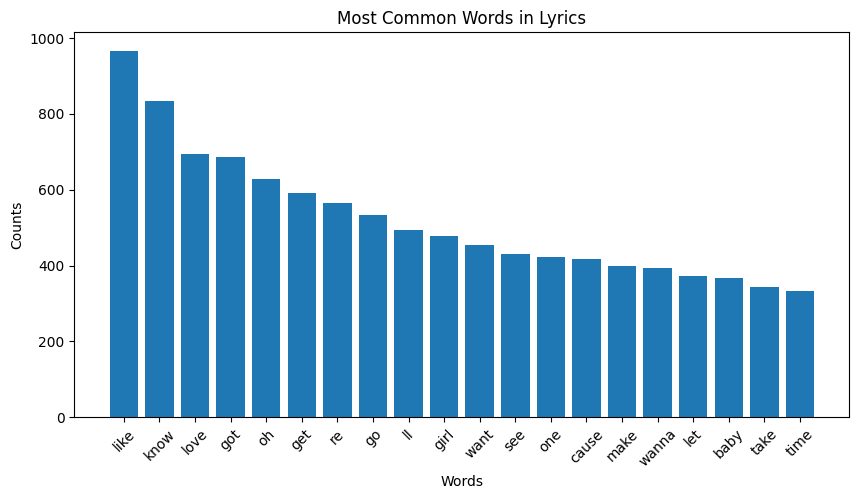

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt

# Assuming reccesion_songs is your DataFrame with the 'Lyrics' column
# Combine all lyrics into a single string
all_lyrics = ' '.join(reccesion_songs['Lyrics'].dropna())

# Define a list of stop words (filler words)
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was',
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
    'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off',
    'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
    'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', "like", 
]

# Initialize CountVectorizer with stop words
vectorizer = CountVectorizer(stop_words=stop_words)
word_counts = vectorizer.fit_transform([all_lyrics])

# Sum up the counts of each vocabulary word
sum_words = word_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Get the most common words
most_common_words = words_freq[:20]

# Display the most common words
print(most_common_words)

# Plot the most common words
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Most Common Words in Lyrics')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

In [81]:
topic_model.visualize_topics()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([[0, 'away | forever | sweet | heartless | place', 7],
                                   [1, 'womanizer | stuntin | diva | just | piece', 7],
                                   [2, 'poker | read | face | girlfriend | realized', 8],
                                   [3, 'walk | want | kiss | dance | just', 29],
                                   [4, 'like | girl | chorus | know | make', 46],
                                   [5, 'cold | whatcha | mmmm | hard | icebox', 5],
                                   [6, 'locked | love | lose | wanted | life', 8],
                                   [7, 'halo | bout | left | know | gonna', 6],
                                   [8, 'love | time | cause | fine | know', 47],
                                   [9, 'shake | disturbia | night | mind | think', 8]], dtype=object),
              'hovertemplate': '<b>Topic %{customdata[0]}</b><br>%{customdata[1]}<br>Size: %{customdata[2]}',
              'legendgroup': '',
              'marker': {'color': '#B0BEC5',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': array([ 7,  7,  8, 29, 46,  5,  8,  6, 47,  8]),
                         'sizemode': 'area',
                         'sizeref': np.float64(0.029375),
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([3.557814 , 1.4419345, 4.799257 , 3.064143 , 1.6591986, 5.3923845,
                          2.7409189, 2.1280007, 2.2792733, 3.5603344], dtype=float32),
              'xaxis': 'x',
              'y': array([-3.2387266, -3.955263 , -3.9156573, -3.5621078, -4.4505267, -3.8187914,
                          -4.5287714, -5.288154 , -4.7379293, -3.9590182], dtype=float32),
              'yaxis': 'y'}],
    'layout': {'annotations': [{'showarrow': False,
                                'text': 'D1',
                                'x': np.float32(1.2256444),
                                'y': np.float32(-4.417147),
                                'yshift': 10},
                               {'showarrow': False,
                                'text': 'D2',
                                'x': np.float32(3.7134433),
                                'xshift': 10,
                                'y': np.float32(-2.7529175)}],
               'height': 650,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'itemsizing': 'constant', 'tracegroupgap': 0},
               'margin': {'t': 60},
               'shapes': [{'line': {'color': '#CFD8DC', 'width': 2},
                           'type': 'line',
                           'x0': np.float32(3.7134433),
                           'x1': np.float32(3.7134433),
                           'y0': np.float32(-6.081377),
                           'y1': np.float32(-2.7529175)},
                          {'line': {'color': '#9E9E9E', 'width': 2},
                           'type': 'line',
                           'x0': np.float32(1.2256444),
                           'x1': np.float32(6.2012424),
                           'y0': np.float32(-4.417147),
                           'y1': np.float32(-4.417147)}],
               'sliders': [{'active': 0,
                            'pad': {'t': 50},
                            'steps': [{'args': [{'marker.color': [['red',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                               

In [83]:
topic_info = topic_model.get_topic_info()

# Display the topic information
print(topic_info)
# Display the top 10 words for each topic
for topic in topic_info['Topic'].unique():
    if topic == -1:
        continue  # Skip the outlier topic
    print(f"Topic {topic}:")
    print(topic_model.get_topic(topic))
    print("\n")

    Topic  Count                            Name  \
0      -1     70         -1_yeah_like_know_wanna   
1       0      7  0_away_forever_sweet_heartless   
2       1      7   1_womanizer_stuntin_diva_just   
3       2      8    2_poker_read_face_girlfriend   
4       3     29          3_walk_want_kiss_dance   
5       4     46         4_like_girl_chorus_know   
6       5      5        5_cold_whatcha_mmmm_hard   
7       6      8       6_locked_love_lose_wanted   
8       7      6           7_halo_bout_left_know   
9       8     47          8_love_time_cause_fine   
10      9      8    9_shake_disturbia_night_mind   

                                       Representation  \
0   [yeah, like, know, wanna, double, make, just, ...   
1   [away, forever, sweet, heartless, place, night...   
2   [womanizer, stuntin, diva, just, piece, habit,...   
3   [poker, read, face, girlfriend, realized, make...   
4   [walk, want, kiss, dance, just, club, know, ah...   
5   [like, girl, chorus, know, ma

In [84]:
topic_model.visualize_barchart(width=280, height=330, top_n_topics=8, n_words=20)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': '#D55E00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.05268017233869227, 0.057406492504664126,
                    0.06321620680643072, 0.07176793073699599, 0.07494207122437353,
                    0.0772673672438831, 0.08000032964230418, 0.08724004074777943,
                    0.13176904833779518, 0.1866521465698233],
              'xaxis': 'x',
              'y': [hiding  , summer  , alabama  , singing  , night  , place  ,
                    heartless  , sweet  , forever  , away  ],
              'yaxis': 'y'},
             {'marker': {'color': '#0072B2'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.06021214334977523, 0.0629133671974641, 0.068618018592415,
                    0.07493224872719699, 0.09404154786845471, 0.09519497362745985,
                    0.11465779447530608, 0.12066557350268481, 0.13249903196791532,
                    0.23720314541029416],
              'xaxis': 'x2',
              'y': [like  , circus  , hustla  , chevy  , habit  , piece  , just  ,
                    diva  , stuntin  , womanizer  ],
              'yaxis': 'y2'},
             {'marker': {'color': '#CC79A7'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.05818095584522669, 0.06038650192124543, 0.06068683577152451,
                    0.06287191049121063, 0.06562283388870106, 0.08243893245779241,
                    0.08243893245779241, 0.1480305529252468, 0.16270200921031397,
                    0.16602274457792215],
              'xaxis': 'x3',
              'y': [stay  , know  , just  , cold  , make  , realized  , girlfriend
                    , face  , read  , poker  ],
              'yaxis': 'y3'},
             {'marker': {'color': '#E69F00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.031213074938106284, 0.03301712473907186,
                    0.033633190326003114, 0.033812100276215604,
                    0.03771190402016452, 0.037731092779872716, 0.03897723516101094,
                    0.05084757619971471, 0.054030994107222174, 0.06041474299324215],
              'xaxis': 'x4',
              'y': [baby  , love  , ahead  , know  , club  , just  , dance  , kiss
                    , want  , walk  ],
              'yaxis': 'y4'},
             {'marker': {'color': '#56B4E9'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.022415319242024043, 0.022882155868319036,
                    0.024016814760061702, 0.026333327405868086,
                    0.027739337257643663, 0.029303327361899733,
                    0.03466844987574026, 0.036416234292460235, 0.03905937673686936,
                    0.05340931690110558],
              'xaxis': 'x5',
              'y': [nigga  , right  , verse  , money  , just  , make  , know  ,
                    chorus  , girl  , like  ],
              'yaxis': 'y5'},
             {'marker': {'color': '#009E73'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.0513831166125275, 0.052725126793237834, 0.06096992602326031,
                    0.064744824419367, 0.07600936541226568, 0.08379535609881388,
                    0.08701383691803415, 0.09824761787790835, 0.14399289465226464,
                    0.1894132470474793],
              'xaxis': 'x6',
              'y': [wait  , true  , baby  , chorus  , lovin  , life  , wanted  ,
                    lose  , love  , locked  ],
              'yaxis': 'y6'},
             {'marker': {'color': '#F0E442'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.030164937749663886, 0.030935838930870777,
                    0.0342073845291769, 0.035078837848526084, 0.03963288064505011,
                    0.03976814216469589, 0.05035469477087534, 0.052169734110743354,
                    0.06306608105378805, 0.07470478991976057],
              'xaxis': 'x7

In [86]:
topic_model.visualize_heatmap(n_clusters=9, width=800, height=800)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>Similarity Score: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': [0_away_forever_sweet, 1_womanizer_stuntin_diva,
                    2_poker_read_face, 3_walk_want_kiss, 6_locked_love_lose,
                    8_love_time_cause, 4_like_girl_chorus, 5_cold_whatcha_mmmm,
                    7_halo_bout_left, 9_shake_disturbia_night],
              'xaxis': 'x',
              'y': [0_away_forever_sweet, 1_womanizer_stuntin_diva,
                    2_poker_read_face, 3_walk_want_kiss, 6_locked_love_lose,
                    8_love_time_cause, 4_like_girl_chorus, 5_cold_whatcha_mmmm,
                    7_halo_bout_left, 9_shake_disturbia_night],
              'yaxis': 'y',
              'z': array([[1.        , 0.66487819, 0.69885807, 0.76592288, 0.74542166,
                           0.71746866, 0.72433091, 0.68599589, 0.69516995, 0.72486789],
                          [0.66487819, 1.        , 0.72442578, 0.70614715, 0.66061955,
                           0.68797333, 0.75725896, 0.69377759, 0.6523436 , 0.68458379],
                          [0.69885807, 0.72442578, 1.        , 0.81449983, 0.7885083 ,
                           0.80217517, 0.7881942 , 0.78746995, 0.74405337, 0.71232903],
                          [0.76592288, 0.70614715, 0.81449983, 1.        , 0.85042022,
                           0.84216156, 0.82528621, 0.7510972 , 0.74217168, 0.76348487],
                          [0.74542166, 0.66061955, 0.7885083 , 0.85042022, 1.        ,
                           0.86991526, 0.78020726, 0.73377326, 0.73708301, 0.73748764],
                          [0.71746866, 0.68797333, 0.80217517, 0.84216156, 0.86991526,
                           1.        , 0.83455156, 0.77749069, 0.76839326, 0.72371037],
                          [0.72433091, 0.75725896, 0.7881942 , 0.82528621, 0.78020726,
                           0.83455156, 1.        , 0.78389157, 0.73943761, 0.74496254],
                          [0.68599589, 0.69377759, 0.78746995, 0.7510972 , 0.73377326,
                           0.77749069, 0.78389157, 1.        , 0.72240861, 0.70935978],
                          [0.69516995, 0.6523436 , 0.74405337, 0.74217168, 0.73708301,
                           0.76839326, 0.73943761, 0.72240861, 1.        , 0.68494396],
                          [0.72486789, 0.68458379, 0.71232903, 0.76348487, 0.73748764,
                           0.72371037, 0.74496254, 0.70935978, 0.68494396, 1.        ]])}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Similarity Score'}},
                             'colorscale': [[0.0, 'rgb(247,252,240)'], [0.125,
                                            'rgb(224,243,219)'], [0.25,
                                            'rgb(204,235,197)'], [0.375,
                                            'rgb(168,221,181)'], [0.5,
                                            'rgb(123,204,196)'], [0.625,
                                            'rgb(78,179,211)'], [0.75,
                                            'rgb(43,140,190)'], [0.875,
                                            'rgb(8,104,172)'], [1.0,
                                            'rgb(8,64,129)']]},
               'height': 800,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'title': {'text': 'Trend'}},
               'margin': {'t': 60},
               'showlegend': True,
               'template': '...',
               'title': {'font': {'color': 'Black', 'size': 22},
                         'text': '<b>Similarity Matrix</b>',
                         'x': 0.55,
                         'xanchor': 'center',
                         'y': 0.95,
                         'yanchor': 'top'},
               'width': 800,
               'xaxis': {'anchor': 'y', 'constrain': 'domain', 'domain': [0.0, 1.

In [88]:
topic_model.visualize_documents(lyrics,
# These were calculated beforehand with UMAP
topics=list(range (30)), custom_labels=True, height=600)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'text',
              'hovertext': array(["This  ...\r\n guess    this woman slip away\r\nCause      \r\n   lookin' over your shoulder\r\n  make   over\n\nExcuse  miss lady,   doin'\n\nyour body lookin' right\n\n like , ' pursuin'\n\n    little closer\n\n     know   exchange names  thangs\n\nbefore  night  over\n\n\n\n  really want \n\n   back  \n\n    your weight  \n\ncause ' alright\n\n what  wanna\n\nmake  believe \n\n wanna  \n\n\n\n  shawty\n\n  shawty\n\n  shawty\n\n  shawty\n\n  shawty\n\n  shawty\n\n\n\n guess      night just drift away\n\n baby whatcha ' ?\n\nCause  ' wanna lose \n\ncome  keep  movin'\n\nexcuse  miss lady,   doin'\n\nYour body lookin' right,\n\n like , ' pursuin'\n\n    little closer\n\n     know   exchange names  thangs\n\nbefore  night  over\n\n\n\n  really want \n\n   back  \n\n    your weight  \n\ncause ' alright\n\n what  wanna\n\nmake  believe \n\n wanna  \n\n\n\n  shawty\n\n  shawty\n\n  shawty\n\n  shawty\n\n  shawty\n\n  shawty\n\n\n\n  really want \n\n   back  \n\n    your weight  \n\ncause ' alright\n\n what  wanna\n\nmake  believe \n\n wanna  \n\n\n\n  shawty\n\n  shawty\n\n  shawty\n\n  shawty\n\n  shawty\n\n  shawty",
                                  "[Wynter]\r\n double  double , double  double \n double  double , double  double\r\n double  double , double  double\r\n double  double \n\n lips like sugar,  lips like sugar \n\nThis candy   sprung, this candy   sprung \n\n call  your sugar,  call  your sugar \n\n love  some,  love  some \n\n\n\n' sweet like \n\n double  double , double  double\n\n double  double , double  double\n\n' sweet like\n\n double  double , double  double\n\n' sweet like\n\n double  double \n\nSugar\n\n\n\n[ Rida]\n\n, '   mouth full  cavities \n\nSweet tooth, full  mama , like sugar   \n\n  Love with  lips,       tone \n\nShawty gotta kiss , '  emergency \n\nSpit sprung   taste, addicted   gloss \n\n' smile this , baby     \n\n  tongue  your face \n\n little mistletoe, sippin' Gram . .\n\n'     \n\n  that favor, cause  like your flavor \n\n manage behavior, ' into your major \n\nSweeter  flavor, that' good  this player \n\n hood ,   later, throw back like  pager \n\nPretty much, ' givin'   sugar rush \n\n mama, give  high blood pressure when  blush \n\nLips feel soft   feather when  touch , shawty that' what'  \n\n\n\n[Wynter]\n\n lips like sugar,  lips like sugar\n\nThis candy   sprung, this candy   sprung\n\n call  your sugar,  call  your sugar\n\n love  some,  love  some\n\n\n\n' sweet like\n\n double  double , double  double\n\n double  double , double  double\n\n' sweet like\n\n double  double , double  double\n\n' sweet like\n\n double  double \n\nSugar\n\n\n\n[ Rida]\n\n, -shawty would  mind, cause  want  some \n\n  later,  ' wanna have  wait, '   \n\n !  ! Your vision, ,  delicious \n\n' help  interest, candy addiction \n\nWanna peace,   piece gotta   piece \n\n ' know ' piece, give   your sweets\n\nBottom   , 'bout  have  sugar feast \n\nLevel with  trip, '   bitin' beast \n\n  them things,   teeth \n\nSqueeze  sugar cane  your mouth, must beat \n\n' your mama slirp, stickin', usin'  tree \n\nLike taffy  classy ,    \n\n' flyin',   know  wanna kiss \n\n your lips, they'   fine \n\n baby ' trip with  juicy kind \n\n,    grip, girl  ' lyin' \n\n\n\n[Wynter]\n\n lips like sugar,  lips like sugar\n\nThis candy   sprung, this candy   sprung\n\n call  your sugar,  call  your sugar\n\n love  some,  love  some\n\n\n\n' sweet like\n\n double  double , double  double\n\n double  double , double  double\n\n' sweet like\n\n double  double , double  double\n\n' sweet like\n\n double  double \n\nSugar\n\n\n\n[ Rida]\n\n' like  sugar,  sugar\n\n'  sweet,  sweet\n\nLike  candy,  candy\n\n'  sweet,  sweet\n\n   good appetite with   ,   \n\n' wrap    these clothes \n\n'  treat,  treat\n\nGirl '  sugar,  call  Candy\n\n tonight ' gonna   some,   some \n\nGirl '  sugar,  call  Candy\n\n tonight ' gonna   some,   some sugar\n\n\n\n[Wynter]

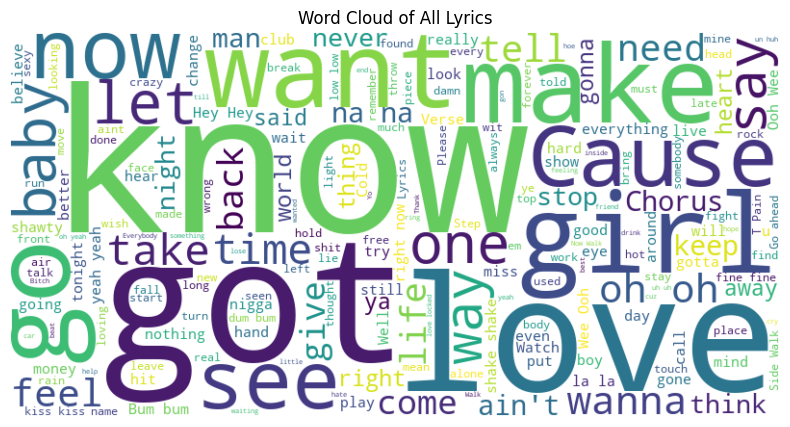

In [89]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming reccesion_songs is your DataFrame with the 'Lyrics' column
# Combine all lyrics into a single string
all_lyrics = ' '.join(reccesion_songs['Lyrics'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Lyrics")
plt.show()